# <center>Foundations of Deep Learning for the Social Sciences:</br>Day 1 Python Tutorial</center>

This notebook will explore the concepts and models we discussed today using the [Keras](https://keras.io/) and [PyTorch](https://pytorch.org/) Python packages.

Familiarity with Python may be helpful but is not strictly necessary. For those who are familiar with R &mdash; Python is syntactically similar to R, but differs from R in that it is more of an [object-oriented language](https://en.wikipedia.org/wiki/Object-oriented_programming), whereas R is more of a [functional language](https://en.wikipedia.org/wiki/Functional_programming). What this means in practice is that in Python, you'll see a lot of syntax that looks like `object.attribute`. For example, you might define a statistical model (the object), then access its coefficients (the attribute) by typing `model.coef`. In R, on the other hand, you typically use a function to get the parameters: `coef(model)`. In my experience, this isn't too difficult to adjust to.

Python does have the upper hand, however, in that its deep learning packages are further developed and better supported than R's. Hence, most of our tutorials will be in Python. There are now R wrappers for Tensorflow and PyTorch, however, so I will also provide some R code for comparison.

Just like in R, in Python you need to import the packages you intend to use. In Python, packages are imported as objects called *modules* that you are welcome to rename for convenience. The functions included in each package can be used by typing `module.function()` (with appropriate arguments); this may feel similar to typing `package::function()` in R.

Let's begin by importing the deep learning packages we'll be using in this tutorial. We will also import [NumPy](https://numpy.org/), an important Python package for scientific computing.

In [1]:
import tensorflow as tf
from tensorflow import keras
import torch
import numpy as np

np.set_printoptions(threshold = 10) # Make sure printed arrays aren't too big.

## Tensors: The Fundamental Deep Learning Data Structure

Tensors are the basic objects used for computing in deep learning frameworks. In the deep learning context, a tensor is just a multidimensional array. In statistics, we usually only work with 0-dimensional arrays (scalars), 1-dimensional arrays (vectors), and 2-dimensional arrays (matrices):

\begin{equation} \nonumber
    \underbrace{a}_{\text{a scalar}}, \qquad
    \mathbf{a} = \underbrace{\begin{bmatrix}
        a_1 \\
        a_2 \\
        a_3 \\
    \end{bmatrix}}_{\text{a vector}}, \qquad
    \mathbf{A} = \underbrace{\begin{bmatrix}
        a_{1, 1} & a_{1, 2} & a_{1, 3} \\
        a_{2, 1} & a_{2, 2} & a_{2, 3} \\
        a_{3, 1} & a_{3, 2} & a_{3, 3} \\
    \end{bmatrix}}_{\text{a matrix}}.
\end{equation}

In deep learning frameworks, however, arrays can have more dimensions than just two. For example, a 3-dimensional tensor is a stack of matrices:

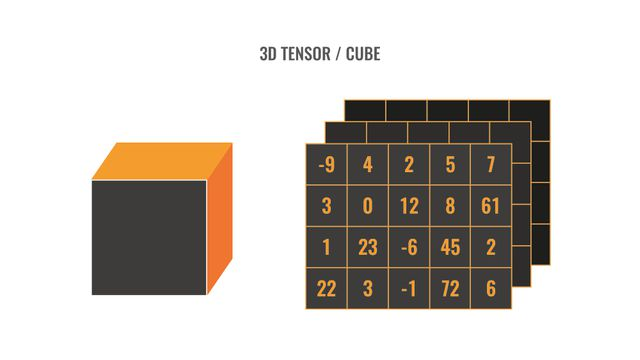

As an example, we might use a 3D tensor to hold a longitudinal data set where we have 30 people answer 10 questions at 5 time points. In this case, we'd typically format our data as a $5 \times 30 \times 10$ tensor. This is rather practical, because now instead of having a list of $5$ $30 \times 10$ matrices that must be operated on separately, all our data is contained in a single array structure that we can perform operations on directly.

Creating tensors in Keras/Tensorflow and PyTorch is straightforward. In NumPy, the equivalent data structure is the array, which is pretty much just a tensor (without automatic differentiation &mdash; although this can be added). It's also straightforward to convert between frameworks.

See below for some examples of creating and indexing tensors. For more in-depth tensor tutorials, see:
- Tensorflow: [tensorflow.org/guide/tensor](https://www.tensorflow.org/guide/tensor).
- PyTorch:[pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)
- NumPy: [numpy.org/doc/stable/user/absolute_beginners.html](https://numpy.org/doc/stable/user/absolute_beginners.html)

In [2]:
"""
Tensors in Tensorflow.
"""
a0 = tf.constant([1]) # A one-element tensor.
a1 = tf.constant([1, 2]) # A two-element tensor (i.e., a vector).
a2 = tf.constant([[1, 2], # A two-dimensional tensor (i.e., a matrix).
                  [3, 4],
                  [5, 6]])
a3 = tf.constant([[[1, 2], # A three-dimensional tensor (i.e., a stack of two matrices).
                   [3, 4],
                   [5, 6]],
                  [[0.1, -32],
                   [9.9, -1],
                   [100, 0]]])

# Print their shapes.
print("\nTensorflow tensor shapes:\n")
print(a0.shape)
print(a1.shape)
print(a2.shape)
print(a3.shape)

"""
Tensors in Pytorch.
"""
b0 = torch.tensor([1]) # A one-element tensor.
b1 = torch.tensor([1, 2]) # A two-element tensor (i.e., a vector).
b2 = torch.tensor([[1, 2], # A two-dimensional tensor (i.e., a matrix).
                   [3, 4],
                   [5, 6]])
b3 = torch.tensor([[[1, 2], # A three-dimensional tensor (i.e., a stack of two matrices).
                   [3, 4],
                   [5, 6]],
                  [[0.1, -32],
                   [9.9, -1],
                   [100, 0]]])

# Print their shapes.
print("\nPyTorch tensor shapes:\n")
print(b0.shape)
print(b1.shape)
print(b2.shape)
print(b3.shape)

# Select some tensor elements.
print("\nTensorflow tensor elements:\n")
print(a0[0]) # Element 0 from a0. NOTE: Python starts indexing at 0, whereas R starts at 1.
print(a2[0]) # Row 0 from a2.
print(a2[:, 1]) # Column 1 from a2.
print(a3[0]) # Matrix 0 from a3.
print(a3[:, 0:2]) # Rows 0-1 from both matrices.
                  # Helpful, e.g., if you want to select a subset of people in a longitudinal data set.
print(a3[..., 0]) # Column 0 from both matrices.
                  # Helpful, e.g., if you want to select a subset of variables in a longitudinal data set.

print("\nPyTorch tensor elements:\n")
print(b0[0]) # Element 0 from b0.
print(b2[0]) # Row 0 from b2.
print(b2[:, 1]) # Column 1 from b2.
print(b3[0]) # Matrix 0 from b3.
print(b3[:, 0:2]) # Rows 0-1 from both matrices.
print(b3[..., 0]) # Column 0 from both matrices.


"""
Arrays in NumPy.
"""
c0 = np.array([1]) # A one-element array.
c1 = np.array([1, 2]) # A two-element array (i.e., a vector).
c2 = np.array([[1, 2], # A two-dimensional array (i.e., a matrix).
               [3, 4],
               [5, 6]])
c3 = np.array([[[1, 2], # A three-dimensional array (i.e., a stack of two matrices).
               [3, 4],
               [5, 6]],
              [[0.1, -32],
               [9.9, -1],
               [100, 0]]])

# Print their shapes.
print("\nNumPy array shapes:\n")
print(c0.shape)
print(c1.shape)
print(c2.shape)
print(c3.shape)

print("\nNumPy array elements:\n")
print(c0[0]) # Element 0 from c0.
print(c2[0]) # Row 0 from c2.
print(c2[:, 1]) # Column 1 from c2.
print(c3[0]) # Matrix 0 from c3.
print(c3[:, 0:2]) # Rows 0-1 from both matrices.
print(c3[..., 0]) # Column 0 from both matrices.

"""
Converting between frameworks.
"""
print("\nConversions:\n")
print(a3.numpy()) # Tensorflow to NumPy.
print(b3.numpy()) # PyTorch to NumPy.
print(tf.convert_to_tensor(c3)) # NumPy to Tensorflow.
print(torch.from_numpy(c3)) # NumPy to PyTorch.


Tensorflow tensor shapes:

(1,)
(2,)
(3, 2)
(2, 3, 2)

PyTorch tensor shapes:

torch.Size([1])
torch.Size([2])
torch.Size([3, 2])
torch.Size([2, 3, 2])

Tensorflow tensor elements:

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[[  1.    2. ]
  [  3.    4. ]]

 [[  0.1 -32. ]
  [  9.9  -1. ]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor(
[[  1.    3.    5. ]
 [  0.1   9.9 100. ]], shape=(2, 3), dtype=float32)

PyTorch tensor elements:

tensor(1)
tensor([1, 2])
tensor([2, 4, 6])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[[  1.0000,   2.0000],
         [  3.0000,   4.0000]],

        [[  0.1000, -32.0000],
         [  9.9000,  -1.0000]]])
tensor([[  1.0000,   3.0000,   5.0000],
        [  0.1000,   9.9000, 100.0000]])

NumPy array shapes:

(1,)
(2,)
(3, 2)
(2, 3, 2)

NumPy array elements:

1
[1 2]
[2 4 6]
[[1. 2.

2022-10-06 14:39:46.055478: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Univariate Logistic Regression

Similar to the first lecture, we will demonstrate some basic deep learning concepts using logistic regression. This will also help further introduce the syntax used by Keras and PyTorch before getting into more complicated deep learning examples.

We'll use the same toy example we used in lecture where $x \geq 0$ is the number of hours slept last night and $y \in \{0, 1\}$ is whether one experiences a depressive episode the following day ($y = 1$ means a depressive episode occurred). The data is generated as follows:
\begin{align}
    x &\sim \text{Uniform}(0, 12) \nonumber \\
    y &\sim \text{Bernoulli}(\sigma(-0.5 x + 3)), \nonumber
\end{align}
where $\sigma(z) = 1 / (1 + \exp[-z])$ is the inverse logistic link or *sigmoid* function. In words, the probability of experiencing a depressive episode decreases as the number of hours slept last night increases.

We simulate the data below using NumPy.

In [3]:
np.random.seed(100) # Set random seed for reproducibility.

sample_size = 1000
x = np.random.uniform(low = 0, high = 12, size = (sample_size, 1)) # Draw x from a uniform distribution.
y = np.random.binomial(n = np.ones((sample_size, 1), dtype = "int64"), # Draw y from a conditional Bernoulli distribution.
                       p = 1 / (1 + np.exp(-(-0.5 * x + 3))))

print("\nx:\n", x,
      "\n\ny:\n", y)


x:
 [[6.5208593 ]
 [3.34043262]
 [5.09421109]
 ...
 [1.81043068]
 [0.44318476]
 [7.17556491]] 

y:
 [[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


We're going to fit a univariate logistic regression model:
\begin{equation}
    \hat{y} = \sigma(wx + b), \nonumber
\end{equation}
where $w$ is a slope, $b$ is an intercept, and $\hat{y}$ is the predicted probability that the outcome is equal to $1$. This is the model we used in lecture when we introduced backpropagation and stochastic gradient methods.

We'll begin by defining this model using Keras. Keras is a high-level interface to [Tensorflow](https://www.tensorflow.org/), one of Python's major deep learning frameworks. In Keras, we first the define the model, then compile and fit it to data. This approach amounts to defining a static (i.e., fixed) computational graph that we repeatedly make forward and backward passes through. In contrast, we will see that PyTorch allows us create a dynamic computational graph that can easily change across fitting iterations.

Below, we define and fit a univariate logistic regression model to the simulated data using Keras. The basic model building process is:

1. define the model as a set of layers that process the predictors sequentially;
2. tell the model the loss function and optimizer to use for fitting; and
3. fit the model.

Keras keeps all of the details of backpropagation under the hood &mdash; the model is fitted with a simple `model.fit()` call. By default, upddates are printed to the screen as fitting progresses.

We can see that the fitted parameters are pretty accurate.

In [4]:
from tensorflow import optimizers
from keras import (models,
                   layers,
                   activations)

keras.utils.set_random_seed(123) # Set random seed for reproducibility.

model = models.Sequential() # This is a container to hold different neural network layers.
                            # It will apply these layers to the predictors in the sequence
                            # in which they are added.
model.add(layers.Dense(units = 1,                         # The Dense() layer is a basic layer that multiplies
                       activation = activations.sigmoid)) # the predictors by a regression weight matrix, adds
                                                          # a vector of intercepts, and applies an activation function.
                                                          # The units argument determines how many outputs we produce.
    
model.compile(optimizer = optimizers.Adam(learning_rate = 0.01, amsgrad=True), # Adam is a popular stochastic gradient-based optimizer.
                                                                 # It uses a little bit of curvature information and
                                                                 # usually outperforms vanilla stochastic gradient descent.
              loss = "binary_crossentropy", # This is the machine learning name for the logistic loss.
              metrics = ["accuracy"]) # Record the model's accuracy as fitting progresses.

history = model.fit(tf.convert_to_tensor(x),
                    tf.convert_to_tensor(y),
                    epochs = 200, # Fit for 200 passes through the full data set.
                    batch_size = 100) # Sample 100 observations at each fitting iteration.

print("\nFitted w = {}\nFitted b = {}".format(model.get_weights()[0].item(),
                                            model.get_weights()[1].item()))

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 2.4476 - accuracy: 0.4970
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 2.2126 - accuracy: 0.5030
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9881 - accuracy: 0.5090
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 1.7653 - accuracy: 0.5190
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5420 - accuracy: 0.5280
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 1.3309 - accuracy: 0.5430
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.5580
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.9504 - accuracy: 0.5840
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.6090
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6470
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7880
Epoch 84/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7890
Epoch 85/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7880
Epoch 86/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7890
Epoch 87/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7870
Epoch 88/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7880
Epoch 89/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7890
Epoch 90/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7900
Epoch 91/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7900
Epoch 92/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7880
Epoch 93/200


We can also plot how the loss function and the predictive accuracy change as fitting progresses. These plots are typically called *training curves*. The training curves show that the loss quickly decreases and the accuracy quickly increases during fitting.

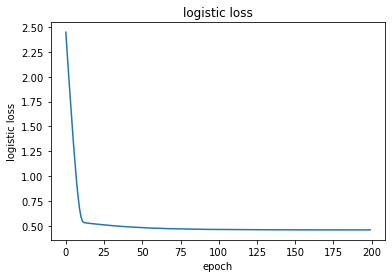

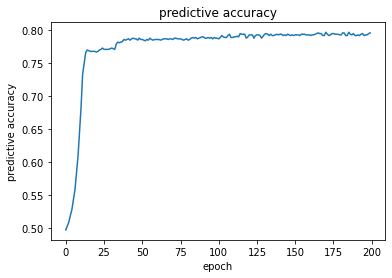

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"])
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

Now let's try the same thing in PyTorch. In PyTorch, we need to be a bit more hands-on than in Keras. In particular, we actually need to write a for loop to iteratively fit the model. This is what I meant earlier when I said that PyTorch makes a dynamic computational graph: we're actually re-building the computational graph during each loop!

We can see that this PyTorch code executes faster than the Keras code and that the final parameter estimates are similar.

In [6]:
from torch.optim import Adam

np.random.seed(222) # Random seeds for reproducibility.
torch.manual_seed(222)

w = torch.randn(1, requires_grad = True) # Initialize both parameters to standard normally sampled values.
b = torch.randn(1, requires_grad = True) # requires_grad = True says we want to compute derivatives for these tensors.

optimizer = Adam(params = [w, b], # We'll use the sample optimizer we used in Keras. We tell it
                 lr = 0.01,
                 amsgrad = True)       # We tell it our parameters and our learning rate.

batch_size = 100
epochs = 200

loss_list = [] # These are to store the loss and accuracy as fitting progresses.
accuracy_list = []

for epoch in range(epochs): # Each epoch passes through the full data set.
    for fit_iter in range(sample_size // batch_size): # Each fit_iter draws 100 random observations.
        optimizer.zero_grad() # We manually set all derivatives to zero to start each loop.
                              # If we don't, derivatives will keep accumulating.
        idxs = np.random.choice(sample_size, size = batch_size, replace = False) # Indices for random sample.
        batch = torch.from_numpy(x[idxs]).float() # Select the random sample.
        
        # Make the forward pass.
        z = w * batch + b # Multiply by weights and add intercept.
        y_hat = z.sigmoid() # This applies the inverse logistic link/sigmoid activation function elementwise to z.
        y_batch = torch.from_numpy(y[idxs]).float() # The observed outcomes associated with our random sample.
        loss = -(y_batch * y_hat.log() + (1 - y_batch) * (1 - y_hat).log()).mean() # Loss function.
        accuracy = ((y_hat > 0.5) == y_batch).float().mean() # Accuracy.
        
        # Make the backward pass.
        loss.backward()
        
        # Take a stochastic gradient step.
        optimizer.step()
    
    z = w * torch.from_numpy(x) + b 
    y_hat = z.sigmoid()
    y_full = torch.from_numpy(y).float() # Evaluate model on full data set.
    loss = -(y_full * y_hat.log() + (1 - y_full) * (1 - y_hat).log()).mean()
    accuracy = ((y_hat > 0.5) == y_full).float().mean()
    loss_list.append(loss.item()) # Save loss and accuracy values.
    accuracy_list.append(accuracy.item())
        
    print("Epoch = {}/{}, Loss = {}, accuracy = {}".format(epoch + 1,
                                                           epochs,
                                                           np.around(loss.item(), 3),
                                                           np.around(accuracy.item(), 3)))
    
print("\nFitted w = {}\nFitted b = {}".format(w.item(),
                                              b.item()))

Epoch = 1/200, Loss = 0.535, accuracy = 0.743
Epoch = 2/200, Loss = 0.512, accuracy = 0.786
Epoch = 3/200, Loss = 0.515, accuracy = 0.794
Epoch = 4/200, Loss = 0.506, accuracy = 0.785
Epoch = 5/200, Loss = 0.502, accuracy = 0.772
Epoch = 6/200, Loss = 0.499, accuracy = 0.772
Epoch = 7/200, Loss = 0.497, accuracy = 0.772
Epoch = 8/200, Loss = 0.494, accuracy = 0.773
Epoch = 9/200, Loss = 0.492, accuracy = 0.785
Epoch = 10/200, Loss = 0.491, accuracy = 0.786
Epoch = 11/200, Loss = 0.487, accuracy = 0.788
Epoch = 12/200, Loss = 0.484, accuracy = 0.786
Epoch = 13/200, Loss = 0.482, accuracy = 0.785
Epoch = 14/200, Loss = 0.481, accuracy = 0.786
Epoch = 15/200, Loss = 0.479, accuracy = 0.787
Epoch = 16/200, Loss = 0.477, accuracy = 0.788
Epoch = 17/200, Loss = 0.477, accuracy = 0.785
Epoch = 18/200, Loss = 0.474, accuracy = 0.786
Epoch = 19/200, Loss = 0.473, accuracy = 0.785
Epoch = 20/200, Loss = 0.472, accuracy = 0.787
Epoch = 21/200, Loss = 0.471, accuracy = 0.794
Epoch = 22/200, Loss =

Epoch = 186/200, Loss = 0.459, accuracy = 0.794
Epoch = 187/200, Loss = 0.459, accuracy = 0.794
Epoch = 188/200, Loss = 0.458, accuracy = 0.793
Epoch = 189/200, Loss = 0.458, accuracy = 0.797
Epoch = 190/200, Loss = 0.461, accuracy = 0.786
Epoch = 191/200, Loss = 0.458, accuracy = 0.792
Epoch = 192/200, Loss = 0.461, accuracy = 0.795
Epoch = 193/200, Loss = 0.458, accuracy = 0.799
Epoch = 194/200, Loss = 0.46, accuracy = 0.787
Epoch = 195/200, Loss = 0.459, accuracy = 0.794
Epoch = 196/200, Loss = 0.459, accuracy = 0.794
Epoch = 197/200, Loss = 0.458, accuracy = 0.797
Epoch = 198/200, Loss = 0.459, accuracy = 0.795
Epoch = 199/200, Loss = 0.458, accuracy = 0.797
Epoch = 200/200, Loss = 0.459, accuracy = 0.794

Fitted w = -0.5147635340690613
Fitted b = 3.177321434020996


Again, we can plot the training curves. They look very similar to the Keras curves.

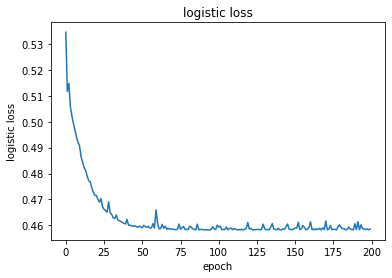

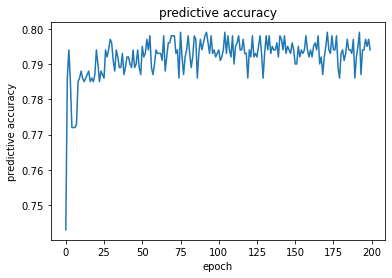

In [7]:
plt.plot(loss_list)
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(accuracy_list)
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

PyTorch also lets us look a bit more closely at the backpropagation algorithm.

Recall that backprop starts with a forward pass to compute the loss, then makes a backward pass to compute the derivatives of the loss with respect to the parameters. Let's reproduce our example forward and backward pass from the lecture. Here's the forward pass:

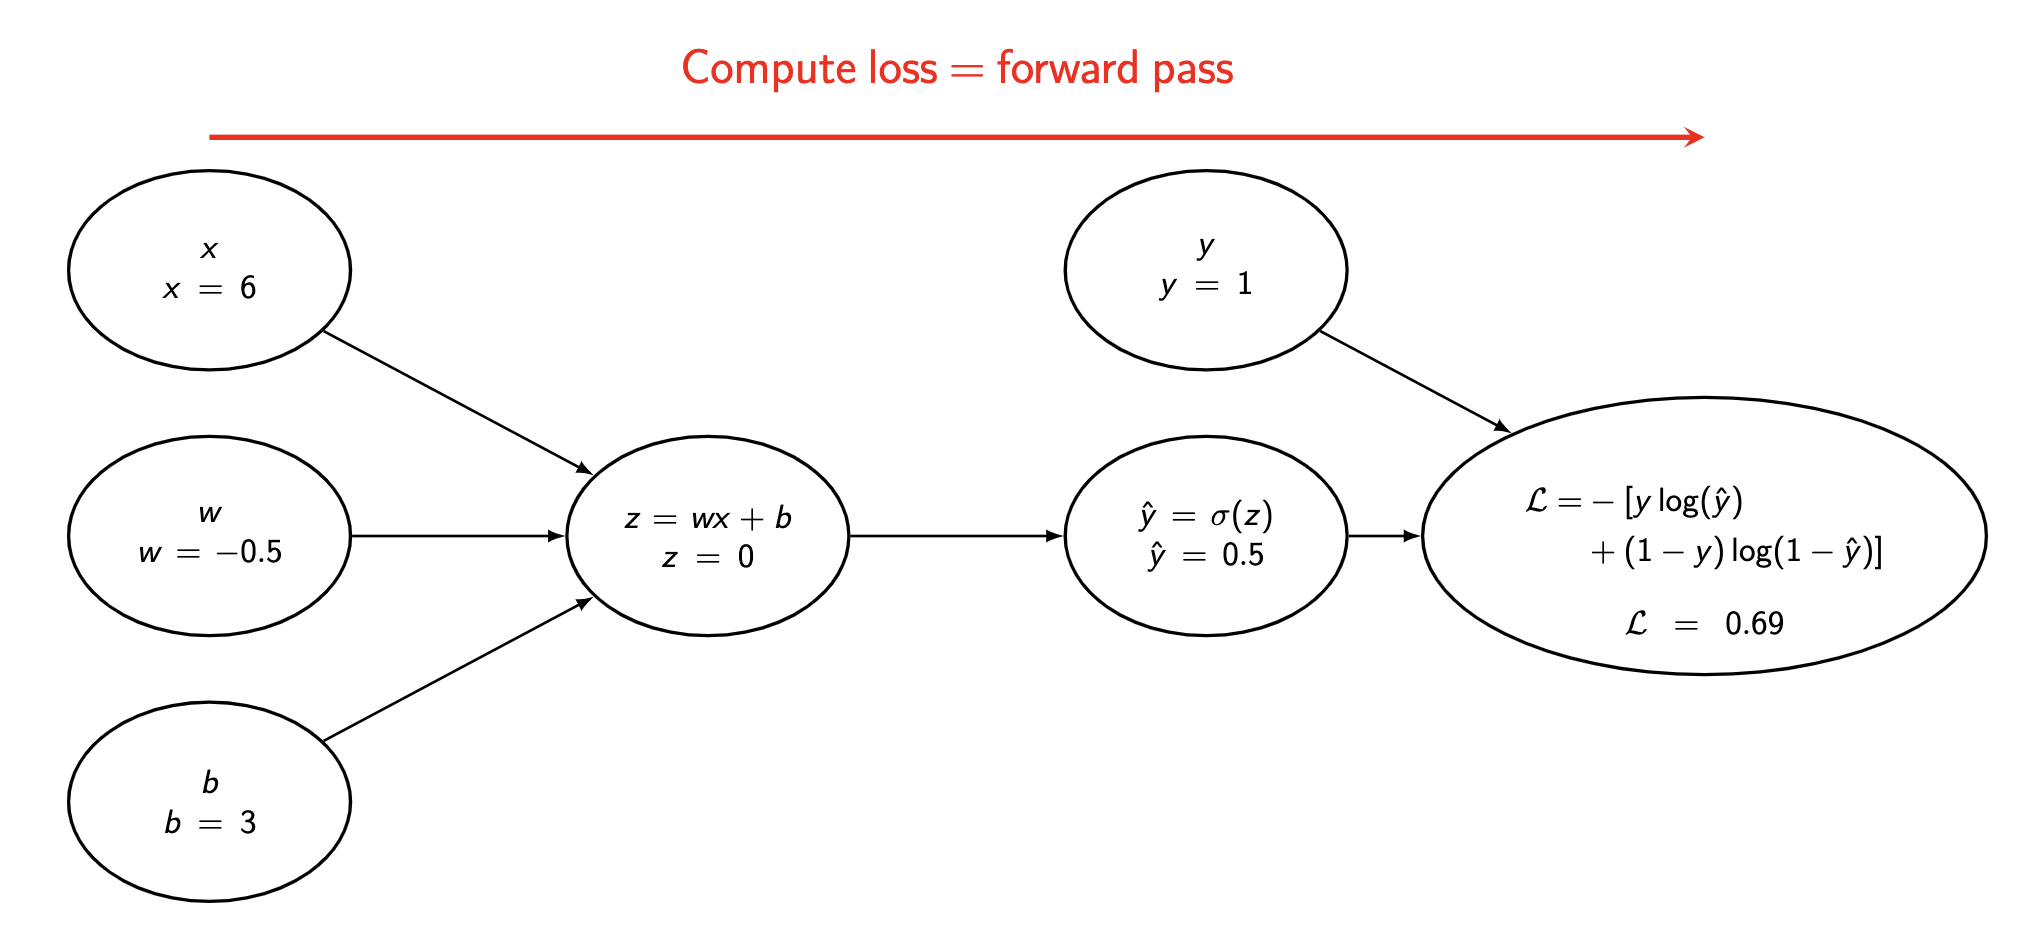

Here's how you'd write the forward pass in PyTorch:

In [8]:
x = torch.tensor([6.])
w = torch.tensor([-0.5], requires_grad = True) # Again, requires_grad = True says we want derivatives for these.
b = torch.tensor([3.], requires_grad = True)
z = w * x + b
z.retain_grad() # PyTorch doesn't normally store derivatives for non-leaf nodes (i.e., nodes in the computational
                # graph that don't have incoming arrows). This command will make sure they are stored.
y_hat = z.sigmoid()
y_hat.retain_grad() # Again, store the derivative for this non-leaf node.
y = torch.tensor([1.])
loss = -(y * y_hat.log() + (1 - y) * (1 - y_hat).log()
loss.retain_grad()

print("\nx = {}".format(x.item()),
      "\n\nw = {}".format(w.item()),
      "\n\nb = {}".format(b.item()),
      "\n\nz = {}".format(z.item()),
      "\n\ny_hat = {}".format(y_hat.item()),
      "\n\ny = {}".format(y.item()),
      "\n\nloss = {}".format(loss.item()))


x = 6.0 

w = -0.5 

b = 3.0 

z = 0.0 

y_hat = 0.5 

y = 1.0 

loss = 0.6931471824645996


Here's the backward pass:

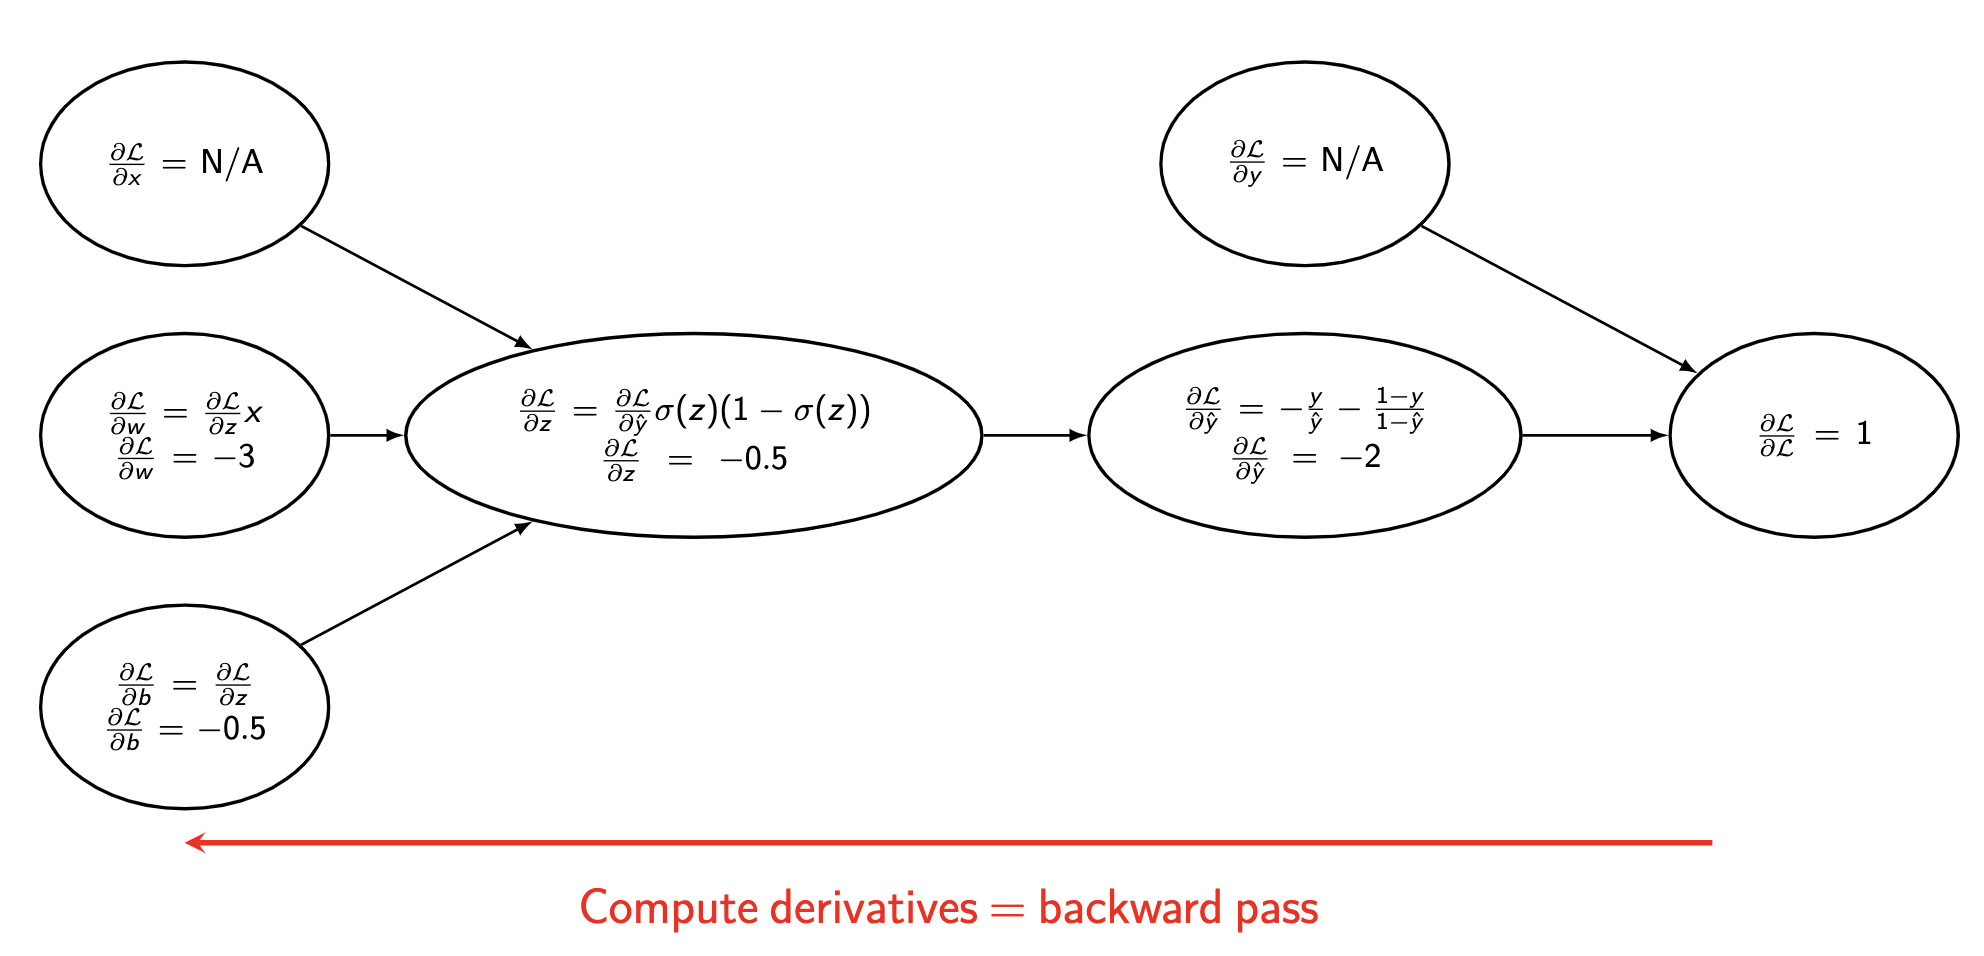

And here's how you'd do it in PyTorch:

In [9]:
loss.backward() # Super easy -- it's just one command.

print("\n\ndL/dx = {}".format(x.grad),
      "\n\ndL/dw = {}".format(w.grad.item()),
      "\n\ndL/db = {}".format(b.grad.item()),
      "\n\ndL/dz = {}".format(z.grad.item()),
      "\n\ndL/dy_hat = {}".format(y_hat.grad.item()),
      "\n\ndL/dy = {}".format(y.grad),
      "\n\ndloss/dloss = {}".format(loss.grad.item()))



dL/dx = None 

dL/dw = -3.0 

dL/db = -0.5 

dL/dz = -0.5 

dL/dy_hat = -2.0 

dL/dy = None 

dloss/dloss = 1.0


## Multivariate Logistic Regression

It's quite easy to extend things to the multivariate setting in both frameworks. Let's say we now have an additional predictor $x_2 \geq 0$ representing the number of hours of exercise yesterday. Our data generating model is now:
\begin{align}
    x_1 &\sim \text{Uniform}(0, 12) \nonumber \\
    x_2 &\sim \text{Uniform}(0, 3) \nonumber \\
    y &\sim \text{Bernoulli}(\sigma(-0.5 x_1 - x_2 + 3)). \nonumber
\end{align}
In words, increasing either number of hours of sleep last night ($x_1$) or number of hours of exercise yesterday ($x_2$) decreases the chances of having a depressive episode today.

Let's sample the data below.

In [10]:
np.random.seed(100)

sample_size = 1000
x1 = np.random.uniform(low = 0, high = 12, size = (sample_size, 1))
x2 = np.random.uniform(low = 0, high = 3, size = (sample_size, 1))
y = np.random.binomial(n = np.ones((sample_size, 1), dtype = "int64"),
                       p = 1 / (1 + np.exp(-(-0.5 * x1 - x2 + 3))))

print("\nx1:\n", x1,
      "\n\nx2:\n", x2,
      "\n\ny:\n", y)


x1:
 [[6.5208593 ]
 [3.34043262]
 [5.09421109]
 ...
 [1.81043068]
 [0.44318476]
 [7.17556491]] 

x2:
 [[0.08319683]
 [1.14671179]
 [2.85975274]
 ...
 [2.94269346]
 [1.09439427]
 [2.33569409]] 

y:
 [[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


Now we're fitting the following logistic regression model:
\begin{equation}
    \hat{y} = \sigma(\mathbf{w}^\top \mathbf{x} + b), \nonumber
\end{equation}
where $\mathbf{w}$ is a slope vector and $\mathbf{x}$ is a predictor vector.

It's pretty easy to fit this model using Keras. In fact, we hardly need to change anything at all -- just the input data!

We see below that the parameter estimates are accurate.

In [11]:
keras.utils.set_random_seed(123)

model = models.Sequential()
model.add(layers.Dense(units = 1,
                       activation = activations.sigmoid))

model.compile(optimizer = optimizers.Adam(learning_rate = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(tf.convert_to_tensor(np.concatenate((x1, x2), axis = 1)), # Combine the two predictor vectors into
                                                                              # a sample_size X 2 matrix. Similar to
                                                                              # R's c() function.
                    tf.convert_to_tensor(y),
                    epochs = 200,
                    batch_size = 100)

print("\nFitted w = \n{}\n\nFitted b = {}".format(model.get_weights()[0],
                                                  model.get_weights()[1]))

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.9395 - accuracy: 0.7140
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.8206 - accuracy: 0.7220
Epoch 3/200
10/10 [==============================] - 0s 989us/step - loss: 0.7202 - accuracy: 0.7200
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7240
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7290
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7420
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.7430
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7480
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.7530
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7580
Epoch 1

10/10 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8060
Epoch 164/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8080
Epoch 165/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8080
Epoch 166/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8060
Epoch 167/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8060
Epoch 168/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8070
Epoch 169/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8060
Epoch 170/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8050
Epoch 171/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8070
Epoch 172/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8100
Epoc

Let's fit the same model in PyTorch. In the last example, we hand coded a bit more than we needed to. In fact, PyTorch has many built-in classes to make building complicated models easier. We demonstrate some of these classes below.

Again, fitted parameters are accurate.

In [12]:
from torch import nn

np.random.seed(222)
torch.manual_seed(222)

model = nn.Sequential(                                  # Conceptually similar to Keras' models.Sequential() --
                                                        # we just stack a seqeuence of transformations.
    torch.nn.Linear(in_features = 2, out_features = 1), # Linear multiplies by a weight matrix and adds an
                                                        # intercept. We just tell it how many predictors and
                                                        # how many outputs we want.
    nn.Sigmoid()                                        
)
optimizer = Adam(params = model.parameters(),
                 lr = 0.01)

batch_size = 100
epochs = 200

loss_list = []
accuracy_list = []

for epoch in range(epochs):
    for fit_iter in range(sample_size // batch_size):
        optimizer.zero_grad()
        idxs = np.random.choice(sample_size, size = batch_size, replace = False)
        batch = torch.from_numpy(np.concatenate((x1, x2), axis = 1)[idxs]).float()
        
        # Make the forward pass.
        y_hat = model(batch)
        y_batch = torch.from_numpy(y[idxs]).float()
        loss = nn.BCELoss()(y_hat, y_batch) # Makes computing the logistic loss easier.
        accuracy = ((y_hat > 0.5) == y_batch).float().mean()
        
        # Make the backward pass.
        loss.backward()
        
        # Take a stochastic gradient step.
        optimizer.step()
        
    # Evaluate model on full data set.
    y_hat = model(torch.from_numpy(np.concatenate((x1, x2), axis = 1)).float())
    loss = nn.BCELoss()(y_hat, torch.from_numpy(y).float())
    loss_list.append(loss.item())
    accuracy_list.append(accuracy.item())
        
    print("Epoch = {}/{}, Loss = {}, accuracy = {}".format(epoch + 1,
                                                           epochs,
                                                           np.around(loss.item(), 3),
                                                           np.around(accuracy.item(), 3)))
    
print("\nFitted w = {}\n\nFitted b = {}".format(model[0].weight,
                                                model[0].bias.item()))

Epoch = 1/200, Loss = 0.861, accuracy = 0.39
Epoch = 2/200, Loss = 0.629, accuracy = 0.64
Epoch = 3/200, Loss = 0.556, accuracy = 0.63
Epoch = 4/200, Loss = 0.542, accuracy = 0.7
Epoch = 5/200, Loss = 0.536, accuracy = 0.69
Epoch = 6/200, Loss = 0.529, accuracy = 0.69
Epoch = 7/200, Loss = 0.522, accuracy = 0.78
Epoch = 8/200, Loss = 0.515, accuracy = 0.73
Epoch = 9/200, Loss = 0.509, accuracy = 0.69
Epoch = 10/200, Loss = 0.503, accuracy = 0.75
Epoch = 11/200, Loss = 0.498, accuracy = 0.66
Epoch = 12/200, Loss = 0.493, accuracy = 0.73
Epoch = 13/200, Loss = 0.488, accuracy = 0.72
Epoch = 14/200, Loss = 0.484, accuracy = 0.66
Epoch = 15/200, Loss = 0.48, accuracy = 0.74
Epoch = 16/200, Loss = 0.476, accuracy = 0.76
Epoch = 17/200, Loss = 0.473, accuracy = 0.75
Epoch = 18/200, Loss = 0.47, accuracy = 0.73
Epoch = 19/200, Loss = 0.467, accuracy = 0.75
Epoch = 20/200, Loss = 0.464, accuracy = 0.73
Epoch = 21/200, Loss = 0.461, accuracy = 0.79
Epoch = 22/200, Loss = 0.458, accuracy = 0.78


Epoch = 200/200, Loss = 0.397, accuracy = 0.8

Fitted w = Parameter containing:
tensor([[-0.5131, -1.0027]], requires_grad=True)

Fitted b = 2.976778984069824


## Multilayer Perceptrons

Finally, we'll get into deep learning! Just like in lecture, we'll start with the multilayer perceptron, one of the most basic neural networks.

We'll begin with a simulated data set. Here's the setup: suppose we want to predict whether or not students obtain less than $80\%$ correct on an exam ($y \in \{0, 1 \}$. We have two predictors: the average number of hours they study per week ($0 \leq x_1 \leq 10$) and a continuous measure of their stress level ($0 \leq x_2 \leq 10$).

We simulate and plot the data below. Feel free to skip over the simulation procedure, which is a little complicated. Looking at the scatterplot, we see that students who have very high or very low stress levels don't study much, whereas those with moderate stress levels study the most. We can also see that studying less increases one's chances of getting less than $80\%$ correct.

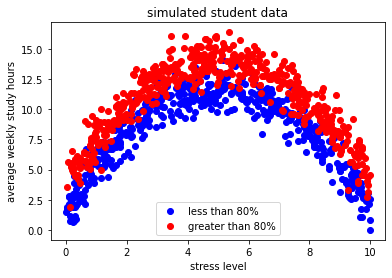

In [13]:
np.random.seed(111)

# Simulating data --- feel free to skip this.
sample_size = 1000
x1 = np.random.uniform(low = -2, high = 2, size = (sample_size, 1))
eps = np.random.normal(size = (sample_size, 1))
offset = np.concatenate((np.ones((sample_size // 2, 1)) * 7.5,
                         np.ones((sample_size // 2, 1)) * 10), axis = 0)
x2 = -2.5 * x1**2 + offset + eps
x2 = x2 + np.abs(x2.min())
x1 = 2.5 * x1 + 5
x = np.concatenate((x1, x2), axis = 1)
y = np.concatenate((np.ones((sample_size // 2, 1)),
                    np.zeros((sample_size // 2, 1))), axis = 0)

# Plot the simulated data.
plt.scatter(x1[:sample_size // 2], x2[:sample_size // 2], c = "blue", label = "less than 80%")
plt.scatter(x1[sample_size // 2:], x2[sample_size // 2:], c = "red", label = "greater than 80%")
plt.legend()
plt.xlabel("stress level")
plt.ylabel("average weekly study hours")
plt.title("simulated student data")
plt.show()

We will first fit a logistic regression model as a baseline. We place $20\%$ of the data in a holdout test set and fit the model using the remaining $80\%$.

The test set accuracy is pretty low &mdash; only $0.575$.

In [14]:
keras.utils.set_random_seed(123)

# Create training and test sets.
test_idxs = np.random.choice(sample_size, size = sample_size // 5, replace = False)
train_idxs = np.setdiff1d(np.arange(sample_size), test_idxs)
train_x, train_y = x[train_idxs], y[train_idxs]
test_x, test_y = x[test_idxs], y[test_idxs]

model = models.Sequential()
model.add(layers.Dense(units = 1,
                       activation = activations.sigmoid))

model.compile(optimizer = optimizers.Adam(learning_rate = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(tf.convert_to_tensor(train_x),
                    tf.convert_to_tensor(train_y),
                    epochs = 500, # Notice that we have increased the number of fitting epochs.
                                  # This is to serve as a point of comparison to the multilayer perceptron we'll
                                  # fit shortly, which needs to train this long to converge.
                    batch_size = 100,
                    verbose = False)

test_accuracy = np.mean((model.predict(tf.convert_to_tensor(test_x)) > 0.5) == test_y)
print("\nLogistic regression test set accuracy = {}".format(test_accuracy))


Logistic regression test set accuracy = 0.575


As before, we show the loss and accuracy as fitting progresses. The loss and accuracy quickly decrease to a minimum and maximum, respectively.

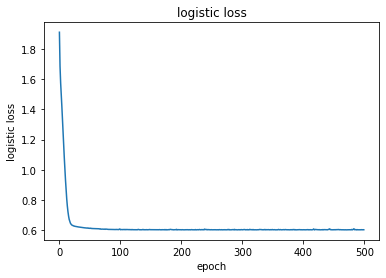

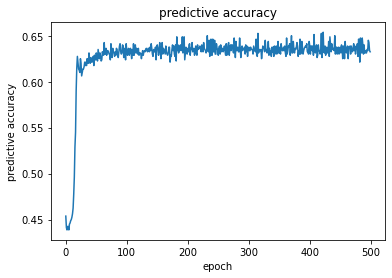

In [15]:
plt.plot(history.history["loss"])
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

We next plot the test set data along with the logistic regression *decision boundry* &mdash; that is, the curve below which the model flags students as at risk of scoring lower than $80\%$ (i.e., $\hat{y} > 0.5$) and above which students are not flagged (i.e., $\hat{y} < 0.5$). The logistic regression decision boundry is a straight line, which does a poor job of separating the red and blue points.

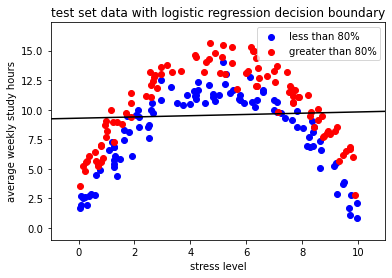

In [16]:
plt.scatter(test_x[(test_y == 1)[:, 0], 0], test_x[(test_y == 1)[:, 0], 1],
            c = "blue", label = "less than 80%")
plt.scatter(test_x[(test_y == 0)[:, 0], 0], test_x[(test_y == 0)[:, 0], 1],
            c = "red", label = "greater than 80%")
plt.legend()
plt.xlabel("stress level")
plt.ylabel("average weekly study hours")

# This makes a mesh grid for plotting the decision boundary.
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(tf.convert_to_tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = 1, colors = "black")
plt.title("test set data with logistic regression decision boundary")
plt.show()

Now let's try to model the data using a multilayer perceptron (MLP). We'll fit the following model with a hidden layer of size $10$ and a $\text{tanh}$ hidden layer activation function:

<div>
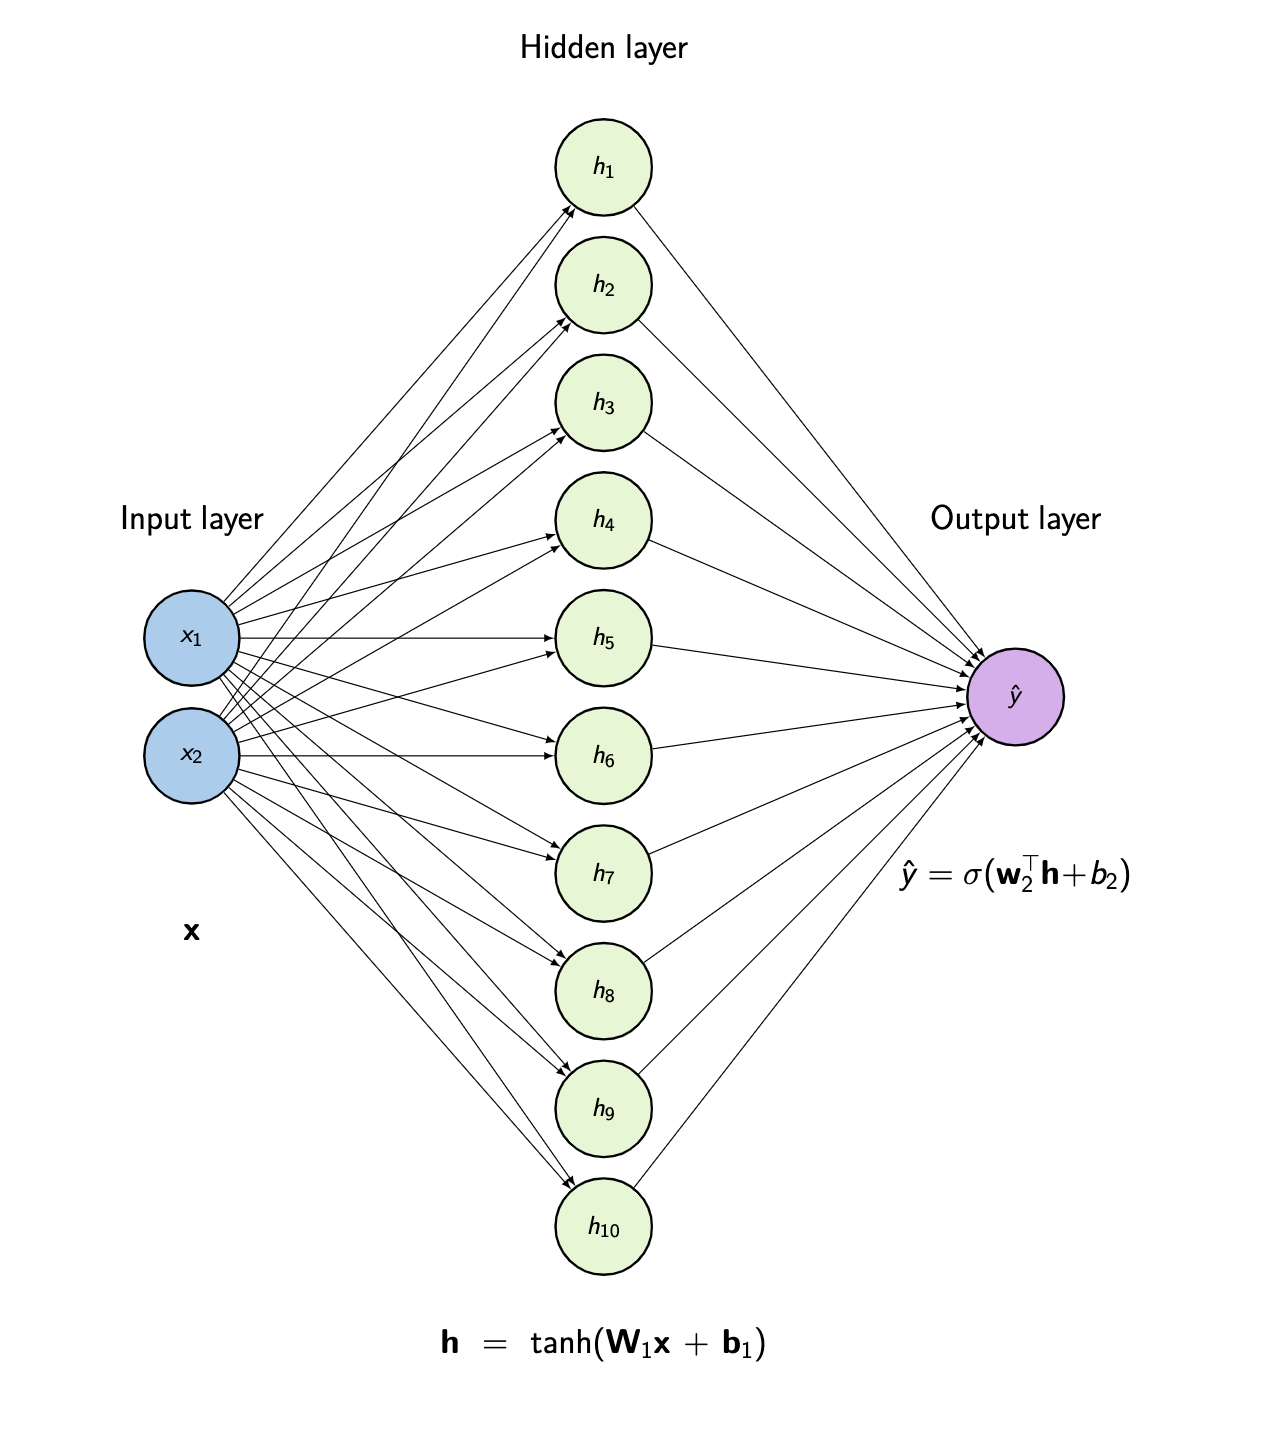
</div>

After fitting, the model's test set accuracy is much better &mdash; $88.5\%$!

In [17]:
keras.utils.set_random_seed(123)

model = models.Sequential()                               # Our model now consists of two processing layers:
model.add(layers.Dense(units = 10,                        # a first layer with 10 outputs that maps the predictors to
                       activation = activations.tanh))    # the hidden layer, and
model.add(layers.Dense(units = 1,                         # a second layer with 1 output that maps the hidden layer
                       activation = activations.sigmoid)) # to the predicted outcome.


model.compile(optimizer = optimizers.Adam(learning_rate = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(tf.convert_to_tensor(train_x),
                    tf.convert_to_tensor(train_y),
                    epochs = 500,
                    batch_size = 100,
                    verbose = False)

test_accuracy = np.mean((model.predict(tf.convert_to_tensor(test_x)) > 0.5) == test_y)
print("\nNeural net test set accuracy = {}".format(test_accuracy))


Neural net test set accuracy = 0.87


The loss and accuracy curves show that the MLP takes much longer to converge than the logistic regression model, but the final loss and accuracy are much better.

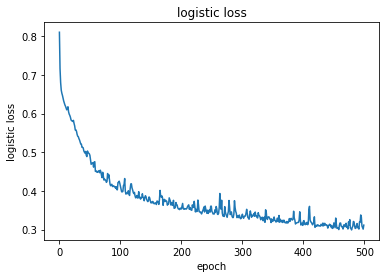

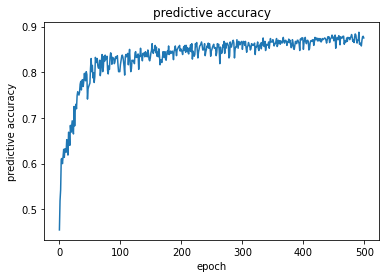

In [18]:
plt.plot(history.history["loss"])
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

A plot of the MLP decision boundary shows that it cleanly separates the red and blue points &mdash; we've successfully flagged at-risk students!

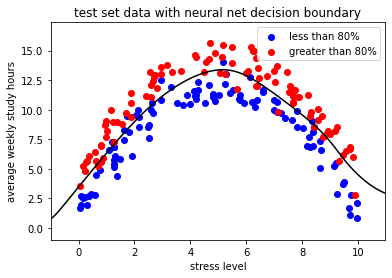

In [19]:
plt.scatter(test_x[(test_y == 1)[:, 0], 0], test_x[(test_y == 1)[:, 0], 1],
            c = "blue", label = "less than 80%")
plt.scatter(test_x[(test_y == 0)[:, 0], 0], test_x[(test_y == 0)[:, 0], 1],
            c = "red", label = "greater than 80%")
plt.legend()
plt.xlabel("stress level")
plt.ylabel("average weekly study hours")

x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(tf.convert_to_tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = 1, colors = "black")
plt.title("test set data with neural net decision boundary")
plt.show()

Let's fit a similar MLP using PyTorch, but now with a ReLU hidden layer activation function. Again, this code executes faster than the Keras code, but the final accuracy is similar.

In [20]:
from torch import nn

np.random.seed(222)
torch.manual_seed(222)

model = nn.Sequential(
    torch.nn.Linear(in_features = 2, out_features = 10), # Similar to Keras, we simply add some new processing layers
    nn.ReLU(),                                           # to our Sequential() model.
    torch.nn.Linear(in_features = 10, out_features = 1),
    nn.Sigmoid()                                        
)
optimizer = Adam(params = model.parameters(),
                 lr = 0.01)

batch_size = 100
epochs = 500

loss_list = []
accuracy_list = []

for epoch in range(epochs):
    for fit_iter in range(sample_size // batch_size):
        optimizer.zero_grad()
        idxs = np.random.choice(train_x.shape[0], size = batch_size, replace = False)
        batch = torch.from_numpy(train_x[idxs]).float()
        
        # Make the forward pass.
        y_hat = model(batch)
        y_batch = torch.from_numpy(train_y[idxs]).float()
        loss = nn.BCELoss()(y_hat, y_batch)
        accuracy = ((y_hat > 0.5) == y_batch).float().mean()
        
        # Make the backward pass.
        loss.backward()
        
        # Take a stochastic gradient step.
        optimizer.step()
        
    # Evaluate model on full data set.
    y_hat = model(torch.from_numpy(train_x).float())
    loss = nn.BCELoss()(y_hat, torch.from_numpy(train_y).float())
    loss_list.append(loss.item())
    accuracy_list.append(accuracy.item())
    
test_accuracy = model(torch.from_numpy(test_x).float()).gt(0.5).eq(torch.from_numpy(test_y)).float().mean()
print("\nNeural net test set accuracy = {}".format(test_accuracy))


Neural net test set accuracy = 0.8799999952316284


The training curves and the decision boundary are similar to those produced by Keras. Notice, however, that the boundary is now piecewise linear &mdash; that's because we're using the ReLU activation, which itself is piecewise linear.

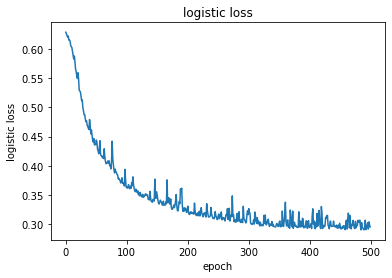

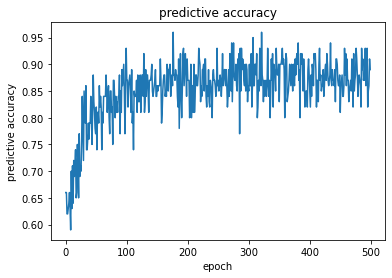

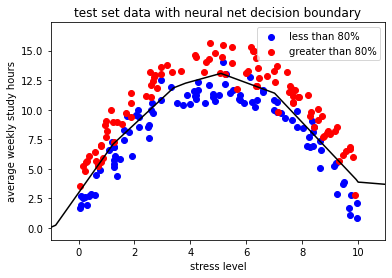

In [21]:
plt.plot(loss_list)
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(accuracy_list)
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

plt.scatter(test_x[(test_y == 1)[:, 0], 0], test_x[(test_y == 1)[:, 0], 1],
            c = "blue", label = "less than 80%")
plt.scatter(test_x[(test_y == 0)[:, 0], 0], test_x[(test_y == 0)[:, 0], 1],
            c = "red", label = "greater than 80%")
plt.legend()
plt.xlabel("stress level")
plt.ylabel("average weekly study hours")

x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()).detach()
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = 1, colors = "black")
plt.title("test set data with neural net decision boundary")
plt.show()

## Recurrent Neural Networks

Recurrent neural networks (RNNs) are highly flexible models for longitudinal data. They are capable of leveraging complex temporal relationships to predict the outcome(s) of interest.

Intuitively, the simplest RNNs are MLPs with loops carrying information forward through time. A basic RNN schematic diagram looks like this:

<div>
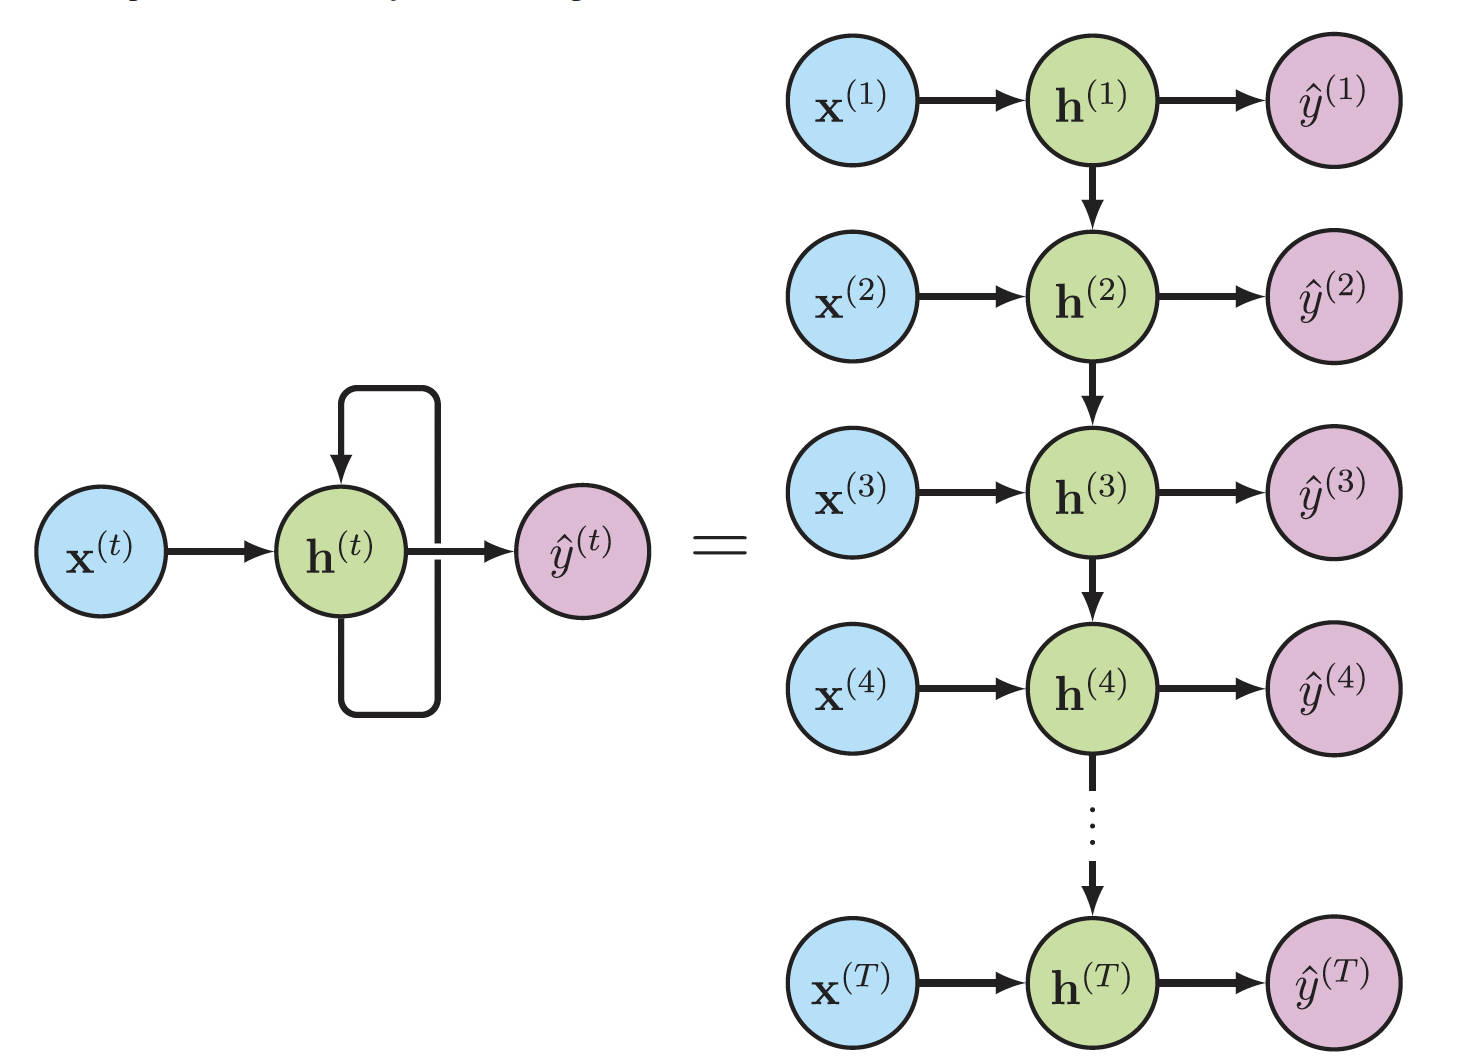
</div>

You can see that at each time point, we have a vector of predictors $\mathbf{x}^{(t)}$ that is mapped to a hidden layer $\mathbf{h}^{(t)}$ which is then mapped to an outcome $y^{(t)}$.

We will demonstrate RNNs using simulated data. Imagine that we track people's levels of sadness ($x_1^{(t)}$) and loneliness ($x_2^{(t)}$) each day in the morning; these are the predictors. We also record whether or not they experience a severe depressive episode by the nighttime ($y^{(t)} = 1$ if a severe depressive episode occurs); this is the outcome. We want to predict whether a person will experience a severe depressive episode each day using their morning mood time series up to that day.

The predictors are generated from the following stochastic dynamical system:
\begin{equation} \nonumber
    x_1^{(0)}, x_2^{(0)} \sim \text{Uniform}(-2, 2), \qquad
    \Delta\begin{bmatrix}
        x_1^{(t)} \\
        x_2^{(t)}
    \end{bmatrix} =
    \begin{bmatrix}
        -0.01 & 0.13 \\
        -0.1 & -0.01
    \end{bmatrix}
    \begin{bmatrix}
        x_1^{(t)} \\
        x_2^{(t)}
    \end{bmatrix}\Delta t + \varepsilon, \qquad \varepsilon \sim \mathcal{N}(0, 0.0025),
\end{equation}
which produces noisy oscillations over time. We simulate depressive episodes as follows: If the sum of a person's sadness and loneliness scores has been higher than $1$ any time in the past $3$ days, they have an $80\%$ chance of experiencing a depressive episode; otherwise, they have a $20\%$ chance.

We simulate the data below and plot the predictors.

/var/folders/w5/lkcb5z4n455_x8bp581kwpdc0000gn/T/ipykernel_37853/133612206.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/w5/lkcb5z4n455_x8bp581kwpdc0000gn/T/ipykernel_37853/133612206.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


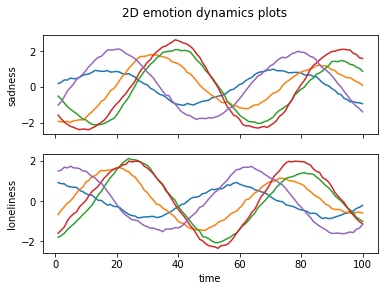

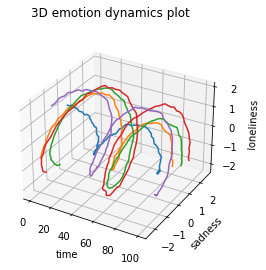

In [22]:
np.random.seed(333)

sample_size = 300
T = 100

# Simulate predictors.
x0 = np.random.uniform(low = -2, high = 2, size = (sample_size, 2))
ar_mat = np.array([[-0.01, 0.13], [-0.1, -0.01]])
X = np.zeros((T, sample_size, 2))
X[0] = x_prev = x0
for t in range(1, T):
    eps = np.random.normal(loc = 0, scale = 0.05, size = (sample_size, 2))
    dx = np.matmul(x_prev, ar_mat.T) + eps
    X[t] = x_prev = x_prev + dx
    
# Simulate outcomes.
Y = np.zeros((T, sample_size, 1))
for t in range(T):
    p_cur = (np.sum((np.sum(X[max(t - 3, 0):t + 1], axis = 2, keepdims = True) > 1), axis = 0) > 0) * 1
    Y[t] = np.random.binomial(n = np.ones((sample_size, 1), dtype = "int64"),
                              p = 0.8 * p_cur + 0.2 * (1 - p_cur))
    
fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].plot(np.linspace(1, T, T), X[..., :5, 0])
axs[1].plot(np.linspace(1, T, T), X[..., :5, 1])
axs[0].set_ylabel("sadness")
axs[1].set_ylabel("loneliness")
axs[1].set_xlabel("time")
fig.suptitle("2D emotion dynamics plots")
fig.show()

fig = plt.figure()
ax = plt.axes(projection = "3d")
for i in range(5):
    ax.plot3D(np.linspace(1, T, T), X[..., i, 0], X[..., i, 1])
ax.set_xlabel("time")
ax.set_ylabel("sadness")
ax.set_zlabel("loneliness")
fig.suptitle("3D emotion dynamics plot")
fig.show()

We will try to fit a long short-term memory (LSTM) network to the data (for details, see this excellent blog post [colah.github.io/posts/2015-08-Understanding-LSTMs/](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)). We'll start with Keras.

This is where things can get a little tricky. We need to make sure our data tensors are in the correct format for the framework we're using. The arrays we simulated have dimensions $\text{time_points} \times \text{batch_size} \times \text{n_variables}$, but Keras wants tensors with dimension $\text{batch_size} \times \text{time_points} \times \text{n_variables}$ (see, e.g., [www.tensorflow.org/guide/keras/rnn](https://www.tensorflow.org/guide/keras/rnn)). So we need to reformat these arrays for use with Keras.

In [23]:
keras.utils.set_random_seed(123)
np.random.seed(123)

# Create training and test sets.
test_idxs = np.random.choice(sample_size, size = sample_size // 5, replace = False)
train_idxs = np.setdiff1d(np.arange(sample_size), test_idxs)
train_X, train_Y = X[:, train_idxs], Y[:, train_idxs]
test_X, test_Y = X[:, test_idxs], Y[:, test_idxs]

model = models.Sequential()
model.add(layers.LSTM(units = 10,
                      return_sequences = True))
model.add(layers.Dense(units = 1,
                       activation = activations.sigmoid))

model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), # We use a lower learning rate for LSTMs for stability.
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(tf.convert_to_tensor(np.transpose(train_X, (1, 0, 2))), # Reformat arrays for Keras here using the
                                                                            # np.transpose() function.
                    tf.convert_to_tensor(np.transpose(train_Y, (1, 0, 2))),
                    epochs = 100,
                    batch_size = 100,
                    verbose = True)

test_accuracy = np.mean(
    (model.predict(tf.convert_to_tensor(np.transpose(test_X, (1, 0, 2)))) > 0.5) == np.transpose(test_Y, (1, 0, 2)))
print("\nNeural net test set accuracy = {}".format(test_accuracy))

Epoch 1/100
3/3 [==============================] - 2s 26ms/step - loss: 0.7086 - accuracy: 0.3665
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7037 - accuracy: 0.3890
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6990 - accuracy: 0.4193
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6944 - accuracy: 0.4584
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6900 - accuracy: 0.5255
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6856 - accuracy: 0.6074
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6813 - accuracy: 0.6455
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6771 - accuracy: 0.6636
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6729 - accuracy: 0.6782
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6689 - accuracy: 0.6897
Epoch 11/100
3/3 [=

The accuracy quickly increases to about $80\%$ (what we'd expect), and the loss decays a little more slowly.

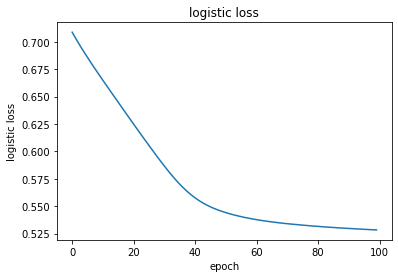

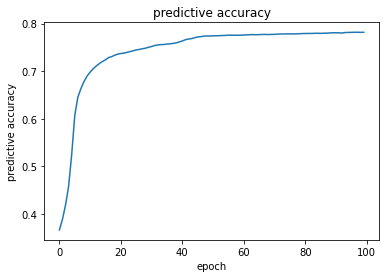

In [24]:
plt.plot(history.history["loss"])
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()

Now we'll fit the same model in PyTorch. By default, PyTorch takes tensor inputs of size $\text{time_points} \times \text{batch_size} \times \text{n_variables}$, so we don't need to mess with our data tensor's shape. The model obtains similar accuracy to the Keras model, and the training curves are quite similar.

In [25]:
from torch import nn

np.random.seed(222)
torch.manual_seed(222)

# In PyTorch, LSTM() and Linear() layers can't be directly stacked because the LSTM()
# has multiple outputs but the Linear() only takes one input. Here, I define a layer
# that just selects the first LSTM() output so I can put it in the Sequential() container.
# This also demonstrates how easy it is to define custom layers in PyTorch.
class get_lstm_output(nn.Module):
    def forward(self, x):
        return x[0]

model = nn.Sequential(
    torch.nn.LSTM(input_size = 2, hidden_size = 10),
    get_lstm_output(),
    torch.nn.Linear(in_features = 10, out_features = 1),
    nn.Sigmoid()                                      
)
optimizer = Adam(params = model.parameters(),
                 lr = 0.001)

batch_size = 100
epochs = 100

loss_list = []
accuracy_list = []

for epoch in range(epochs):
    for fit_iter in range(sample_size // batch_size):
        optimizer.zero_grad()
        idxs = np.random.choice(train_X.shape[1], size = batch_size, replace = False)
        batch = torch.from_numpy(train_X[:, idxs]).float()
        
        # Make the forward pass.
        Y_hat = model(batch)
        Y_batch = torch.from_numpy(train_Y[:, idxs]).float()
        loss = nn.BCELoss()(Y_hat, Y_batch)
        accuracy = ((Y_hat > 0.5) == Y_batch).float().mean()
        
        # Make the backward pass.
        loss.backward()
        
        # Take a stochastic gradient step.
        optimizer.step()
        
    # Evaluate model on full data set.
    Y_hat = model(torch.from_numpy(train_X).float())
    loss = nn.BCELoss()(Y_hat, torch.from_numpy(train_Y).float())
    loss_list.append(loss.item())
    accuracy_list.append(accuracy.item())
    
    print("Epoch = {}/{}, Loss = {}, accuracy = {}".format(epoch + 1,
                                                           epochs,
                                                           np.around(loss.item(), 3),
                                                           np.around(accuracy.item(), 3)))
    
test_accuracy = model(torch.from_numpy(test_X).float()).gt(0.5).eq(torch.from_numpy(test_Y)).float().mean()
print("\nNeural net test set accuracy = {}".format(test_accuracy))

Epoch = 1/100, Loss = 0.702, accuracy = 0.407
Epoch = 2/100, Loss = 0.699, accuracy = 0.403
Epoch = 3/100, Loss = 0.696, accuracy = 0.407
Epoch = 4/100, Loss = 0.692, accuracy = 0.412
Epoch = 5/100, Loss = 0.689, accuracy = 0.47
Epoch = 6/100, Loss = 0.686, accuracy = 0.506
Epoch = 7/100, Loss = 0.682, accuracy = 0.524
Epoch = 8/100, Loss = 0.679, accuracy = 0.569
Epoch = 9/100, Loss = 0.675, accuracy = 0.615
Epoch = 10/100, Loss = 0.671, accuracy = 0.646
Epoch = 11/100, Loss = 0.667, accuracy = 0.651
Epoch = 12/100, Loss = 0.663, accuracy = 0.665
Epoch = 13/100, Loss = 0.659, accuracy = 0.694
Epoch = 14/100, Loss = 0.654, accuracy = 0.716
Epoch = 15/100, Loss = 0.649, accuracy = 0.734
Epoch = 16/100, Loss = 0.645, accuracy = 0.749
Epoch = 17/100, Loss = 0.64, accuracy = 0.748
Epoch = 18/100, Loss = 0.635, accuracy = 0.75
Epoch = 19/100, Loss = 0.629, accuracy = 0.754
Epoch = 20/100, Loss = 0.624, accuracy = 0.759
Epoch = 21/100, Loss = 0.618, accuracy = 0.758
Epoch = 22/100, Loss = 0.

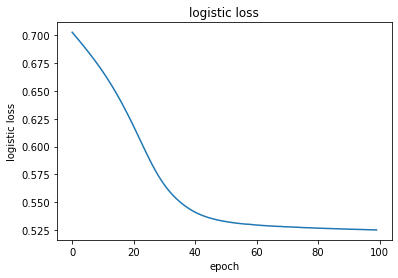

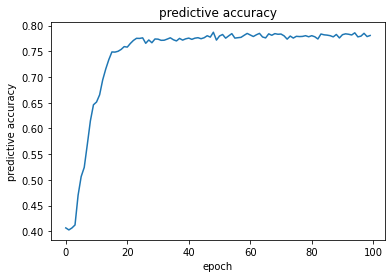

In [26]:
plt.plot(loss_list)
plt.title("logistic loss")
plt.ylabel("logistic loss")
plt.xlabel("epoch")
plt.show()

plt.plot(accuracy_list)
plt.title("predictive accuracy")
plt.ylabel("predictive accuracy")
plt.xlabel("epoch")
plt.show()